# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.
Revisar cada archivo de forma local para ver que parametros usar en la importacion de cada archivo

In [1]:
# importar librerías
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames
df1=pd.read_csv('/datasets/instacart_orders.csv', sep=None, engine='python')
df2=pd.read_csv('/datasets/products.csv', sep=None, engine='python')
df3=pd.read_csv('/datasets/aisles.csv', sep=None, engine='python')
df4=pd.read_csv('/datasets/departments.csv', sep=None, engine='python')
df5=pd.read_csv('/datasets/order_products.csv', sep=None, engine='python')

In [3]:
df1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
df2.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
df3.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
df4.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
df5.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
Tenemos dataframes que tienen datos ausente en algunas columnas y que al ser un archivo con bastantes archivos usamos show_counts=True adicionamente en el metodo info()

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
Realizar la limpieza de datos elimimando los valores duplicados

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(df1.duplicated().sum())

15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Si hay 15 filas duplicadas, los datos en tu totalidad duplicados en las filas

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos=df1[(df1['order_dow']==3)&(df1['order_hour_of_day']==2)]
print(pedidos)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado? que se realizaron 121 pedidos a las 2 de la mañana del dia miercoles

In [10]:
# Elimina los pedidos duplicados
df1=df1.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df1.duplicated().sum())

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df1['order_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos
Se identifico 15 filas completamente duplicadas en el DataFrame orders los cuales se eliminaron para limpiar los datos de la tabla

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(df2.duplicated().sum())

0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print(df2['department_id'].duplicated().sum())

49673


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df2['product_name']=df2['product_name'].str.upper()
print(df2['product_name'].duplicated().sum())

1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
#consulta: por favor me podrian dar mas alcance de este requerimiento

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se pusieron en mayusculas el nombre de productos para comprar de mejor manera su hay nombre duplicados

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(df4.duplicated().sum())

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df4['department_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Al ser un dataframe que almacena los departamentos este no presenta duplicidad en datos

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(df3.duplicated().sum())

0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(df3['aisle_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No se identifico datos duplicados en el DataFrame.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(df5.duplicated().sum())

0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df5['order_id'].duplicated().sum())

4094961


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No hay filas totalmente duplicadas, si hay datos duplicados en la columna order_id ya que ese el id para todos los productos que son agregados al pedido.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df2['product_name'].isna().sum())

1258


Describe brevemente cuáles son tus hallazgos.
Se tiene 1258 datos vacio en la columna 'product_name'

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df2[df2['product_name'].isna()]['aisle_id'].unique())

[100]


Describe brevemente cuáles son tus hallazgos.
Si, el valor que aisle_id tiene es 100 para todos los casos

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df2[df2['product_name'].isna()]['department_id'].unique())

[21]


Describe brevemente cuáles son tus hallazgos.
Si, todos los datos relaciones a los productos con nombres ausentes corresponden al departamento con id 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print('tabla department')
print(df4[df4['department_id']==21])
print('tabla aisle')
print(df3[df3['aisle_id']==100])

tabla department
    department_id department
20             21    missing
tabla aisle
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.
en ambas tablas de identifico que la descripcion de los datos en especifico estan con la denomicion 'missing'

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df2['product_name'] = df2['product_name'].fillna('Unknown')

Describe brevemente tus hallazgos y lo que hiciste con ellos.
se completaron los nombre vacio con 'Unknown' y posterior a ello se valido con info() en la cual se observo que ya no hay valores ausentes

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(df1.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
#consulta: por favor me podrian dar mas alcance de este requerimiento

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
print(df5.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('valores maximos:',df5['add_to_cart_order'].max())
print('valores minimos:',df5['add_to_cart_order'].min())

valores maximos: 64.0
valores minimos: 1.0


Describe brevemente cuáles son tus hallazgos.
como valor minimo tenemos el 1 y como valor maximo tenemos 64 que entenderiamos que seria el numero maximo de pedidos que se tuvo en un dia

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
pedidosValAusen = df5[df5['add_to_cart_order'].isna()]['order_id'].unique()
print(pedidosValAusen)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
pedidosDatAusentes=df5[df5['add_to_cart_order'].isna()]
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
pedidos = pedidosDatAusentes.groupby('order_id')['product_id']
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
numeroPedidos=pedidos.count().min()
print("Número mínimo de productos pedidos con datos ausentes:", numeroPedidos)

Número mínimo de productos pedidos con datos ausentes: 1


Describe brevemente cuáles son tus hallazgos.
Tenemos que el numero minimos de productos que fueron pedidos en una orden es 1

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df5['add_to_cart'] = df5['add_to_cart_order'].fillna(999)
df5['add_to_cart'] = df5['add_to_cart'].astype('int')
df5.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
 4   add_to_cart        4545007 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 173.4 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se realizo el reemplazo de los valores ausentes de la columna 'add_to_cart_order' ademas de ellos se asigno ello a la columna 'add_to_cart' en la cual ya no se identifican valores ausentes y ademas los valores son de tipo entero.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
Se identificaron en las diferentes tablas que tenemos valores ausente y valores duplicados en su totalidad por filas los cuales fueron eliminados para tener datos limpios y de la misma forma con los valores ausentes presentes en algunas tablas se opto por asignales un valor determinado en cada tabla.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print('Valor minimo: ',df1['order_hour_of_day'].min())
print('Valor maximo: ',df1['order_hour_of_day'].max())

Valor minimo:  0
Valor maximo:  23


In [36]:
print('Valor minimo: ',df1['order_dow'].min())
print('Valor maximo: ',df1['order_dow'].max())

Valor minimo:  0
Valor maximo:  6


Escribe aquí tus conclusiones
Se observa que en ambos casos los valores estan dentro de los rangos indicados, por lo tanto si cumple.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

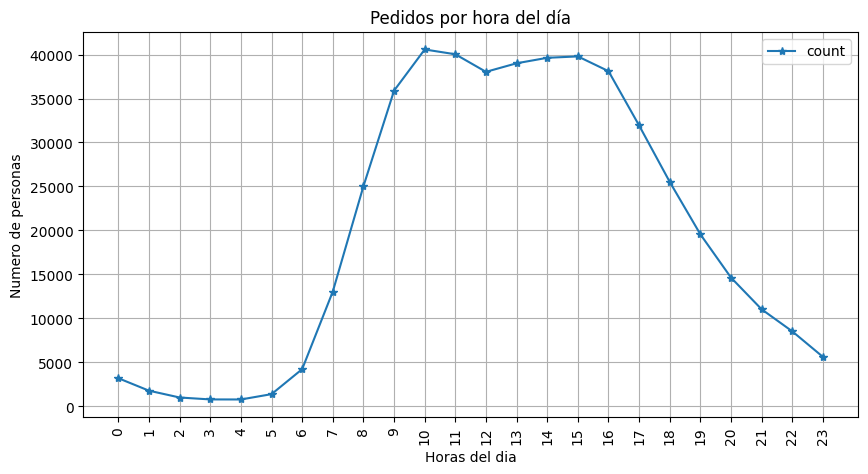

In [37]:
#Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
from matplotlib import pyplot as plt
NumPers=df1.groupby('order_hour_of_day')['order_hour_of_day'].count().reset_index(name='count')
NumPers.plot(
    x='order_hour_of_day',
    y='count',
    style='*-',
    title='Pedidos por hora del día',
    xlabel='Horas del dia',
    ylabel='Numero de personas',
    grid=True,
    xticks=range(0, 24, 1),
    rot=90,
    figsize=[10,5]
)
plt.show()
#print(NumPers)

Escribe aquí tus conclusiones
Observando el gráfico puedo determinar que la hora que tiene mas pedidos es a las 10 y la hora con menos pedidos es a las 4

### [A3] ¿Qué día de la semana compran víveres las personas?

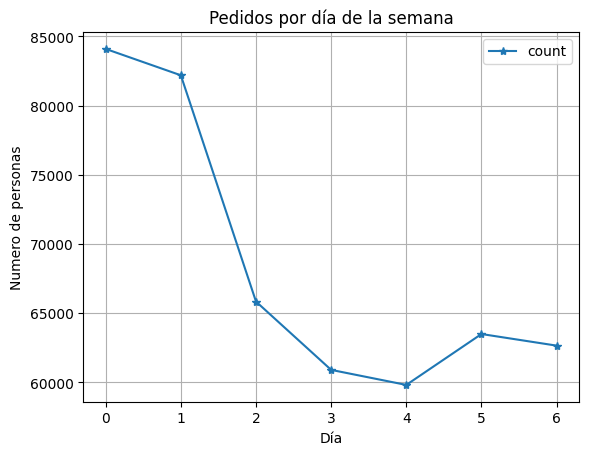

In [38]:
#Crea un gráfico que muestre qué día de la semana la gente hace sus compras
from matplotlib import pyplot as plt
NumPers=df1.groupby('order_dow')['order_dow'].count().reset_index(name='count')
NumPers.plot(
    x='order_dow',
    y='count',
    style='*-',
    title='Pedidos por día de la semana',
    xlabel='Día',
    ylabel='Numero de personas',
    grid=True
)
plt.show()
#print(NumPers)

Escribe aquí tus conclusiones.
Se observa que el dia domingo(0) es el dia que se realizan mas compras para la semana y que el dia jueves(4) es el día que menos realizan compras en la semana.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

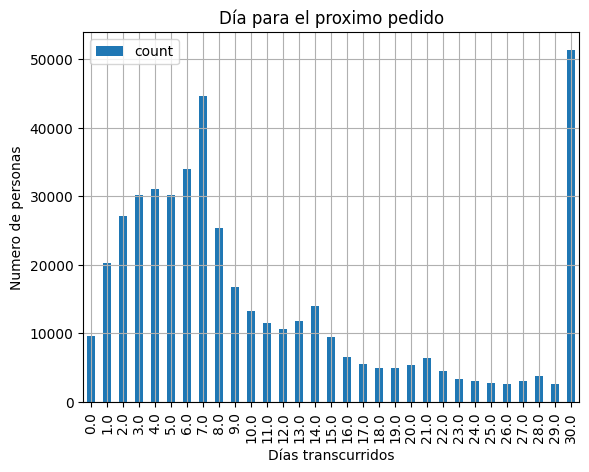

In [39]:
#Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, 
#y comenta sobre los valores mínimos y máximos.
from matplotlib import pyplot as plt
NumPers=df1.groupby('days_since_prior_order')['days_since_prior_order'].count().reset_index(name='count')
NumPers.plot(
    x='days_since_prior_order',
    y='count',
    style='*-',
    title='Día para el proximo pedido',
    xlabel='Días transcurridos',
    ylabel='Numero de personas',
    grid=True,
    kind='bar'
)
plt.show()
#print(NumPers)

Escribe aquí tus conclusiones
Se puede observar el maximo de dias esperados para realizar el siguiente pedido con 30 días y el minimo de dias esperados para realizar la siguiente compra son 26 días.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
#¿Existe alguna diferencia entre las distribuciones 'order_hour_of_day' de los miércoles y los sábados? 
#Traza gráficos de barra de 'order_hour_of_day' para ambos días en la misma figura y describe las diferencias que observes.
from matplotlib import pyplot as plt
NumPers1=df1[df1['order_dow']==3]
Pers1=NumPers1.groupby('order_hour_of_day')['order_dow'].count().reset_index(name='count')

In [41]:
NumPers2=df1[df1['order_dow']==6]
Pers2=NumPers2.groupby('order_hour_of_day')['order_dow'].count().reset_index(name='count')

In [42]:
union = Pers1.merge(Pers2,on='order_hour_of_day',how='inner')

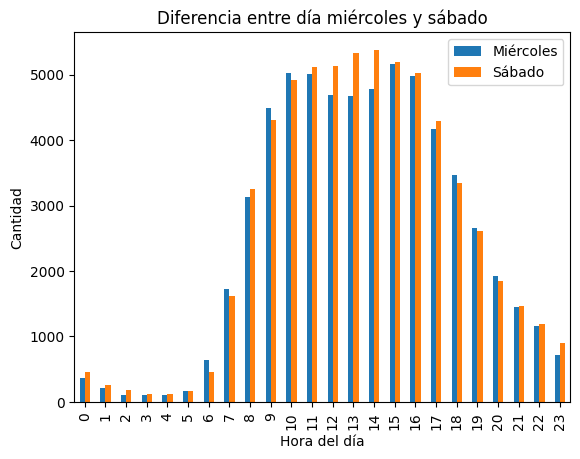

In [43]:
union.plot(
    x='order_hour_of_day',
    y=['count_x','count_y'],
    title='Diferencia entre día miércoles y sábado',
    xlabel='Hora del día',
    ylabel='Cantidad',
    kind='bar'
)
plt.legend(['Miércoles','Sábado'])
plt.show()
#print(union)

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [44]:
#Grafica la distribución para el número de órdenes que hacen los clientes 
#(es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
from matplotlib import pyplot as plt
clientes=df1.groupby('order_number')['order_number'].count().reset_index(name='count')

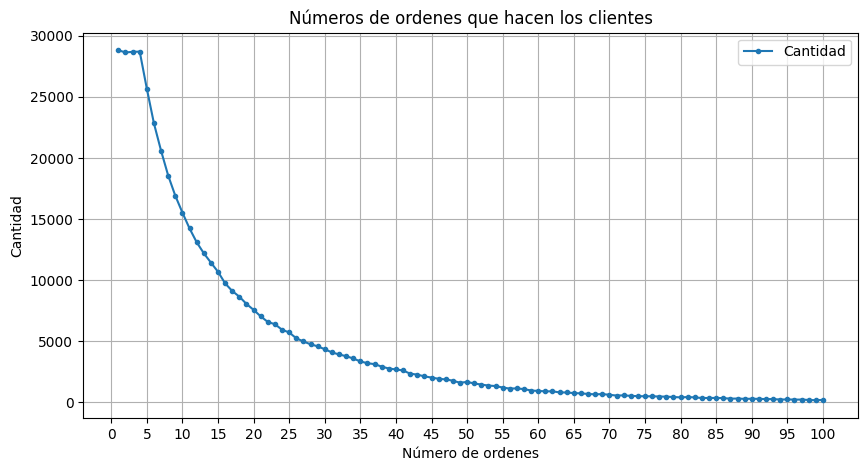

In [45]:
clientes.plot(
    x='order_number',
    y='count',
    style='.-',
    title='Números de ordenes que hacen los clientes',
    xlabel='Número de ordenes',
    ylabel='Cantidad',
    xticks=range(0,101,5),
    grid=True,
    figsize=[10,5]
)
plt.legend(['Cantidad'])
plt.show()
#print(clientes)

Escribe aquí tus conclusiones.
Se observa que la mayoria de las personas realizan entre 1 a 4 pedidos luego va decreciendo la cantidad, tenemos como cantidad con menor numero de pedidos 100 veces.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [46]:
#¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?
from matplotlib import pyplot as plt
product_counts = df5['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'count']
union=product_counts.merge(df2,on='product_id')
top=union[['product_id','product_name','count']].head(20)
print(top)

    product_id              product_name  count
0        24852                    BANANA  66050
1        13176    BAG OF ORGANIC BANANAS  53297
2        21137      ORGANIC STRAWBERRIES  37039
3        21903      ORGANIC BABY SPINACH  33971
4        47209      ORGANIC HASS AVOCADO  29773
5        47766           ORGANIC AVOCADO  24689
6        47626               LARGE LEMON  21495
7        16797              STRAWBERRIES  20018
8        26209                     LIMES  19690
9        27845        ORGANIC WHOLE MILK  19600
10       27966       ORGANIC RASPBERRIES  19197
11       22935      ORGANIC YELLOW ONION  15898
12       24964            ORGANIC GARLIC  15292
13       45007          ORGANIC ZUCCHINI  14584
14       39275       ORGANIC BLUEBERRIES  13879
15       49683            CUCUMBER KIRBY  13675
16       28204        ORGANIC FUJI APPLE  12544
17        5876             ORGANIC LEMON  12232
18        8277  APPLE HONEYCRISP ORGANIC  11993
19       40706    ORGANIC GRAPE TOMATOES

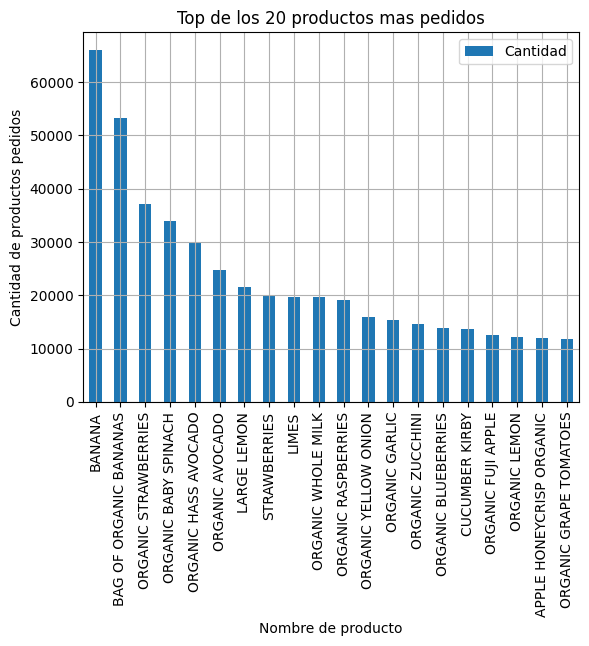

In [47]:
top.plot(
    x='product_name',
    y='count',
    style='.-',
    title='Top de los 20 productos mas pedidos',
    xlabel='Nombre de producto',
    ylabel='Cantidad de productos pedidos',
    rot=90,
    kind='bar',
    grid=True
)
plt.legend(['Cantidad'])
plt.show()

Escribe aquí tus conclusiones. El producto mas vendido en primer lugar son las 'BANANA' y el producto en la posicion 20 de los mas vendidos son las 'ORGANIC GRAPE TOMATOES'

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [48]:
#¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
from matplotlib import pyplot as plt
pedidos = df5['order_id'].value_counts().reset_index(name='conteo')
#print(pedidos)
#df5.info(show_counts=True)

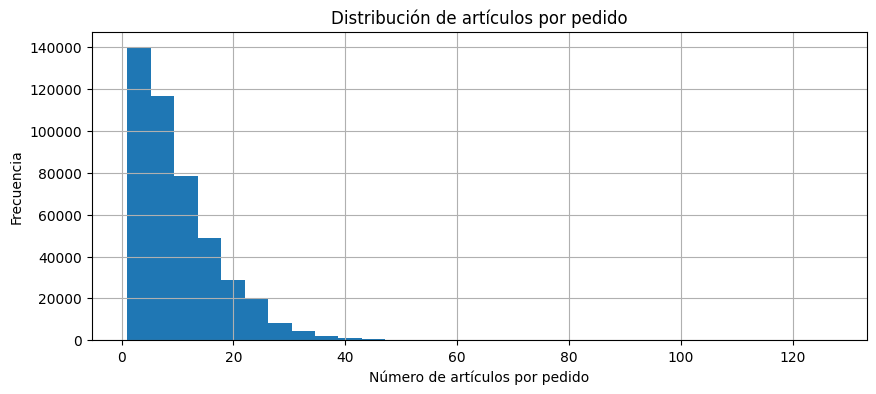

In [49]:
plt.figure(figsize=(10,4))
plt.hist(pedidos['conteo'], bins=30)
plt.title('Distribución de artículos por pedido')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones.
La mayoria de las personas realiza la compra de 1 producto por pedido. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [50]:
#¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia 
#(muestra sus nombres e IDs de los productos)?

In [51]:
from matplotlib import pyplot as plt
product_counts = df5['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'count']
union=product_counts.merge(df2,on='product_id')
top=union[['product_name','product_id']].head(20)
print(top)

                product_name  product_id
0                     BANANA       24852
1     BAG OF ORGANIC BANANAS       13176
2       ORGANIC STRAWBERRIES       21137
3       ORGANIC BABY SPINACH       21903
4       ORGANIC HASS AVOCADO       47209
5            ORGANIC AVOCADO       47766
6                LARGE LEMON       47626
7               STRAWBERRIES       16797
8                      LIMES       26209
9         ORGANIC WHOLE MILK       27845
10       ORGANIC RASPBERRIES       27966
11      ORGANIC YELLOW ONION       22935
12            ORGANIC GARLIC       24964
13          ORGANIC ZUCCHINI       45007
14       ORGANIC BLUEBERRIES       39275
15            CUCUMBER KIRBY       49683
16        ORGANIC FUJI APPLE       28204
17             ORGANIC LEMON        5876
18  APPLE HONEYCRISP ORGANIC        8277
19    ORGANIC GRAPE TOMATOES       40706


Escribe aquí tus conclusiones.
Se observa que el producto más pedido son las 'BANANA'

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [52]:
#Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?

In [53]:
totalproducto=df5.groupby('product_id')['reordered'].count().reset_index(name='total_pedidos')
pedidoRepetido=df5[df5['reordered']==1].groupby('product_id')['reordered'].count().reset_index(name='reordenados')
union=totalproducto.merge(pedidoRepetido,on='product_id')

In [54]:
union['repeticion']=union['reordenados']/union['total_pedidos']
print(union)

       product_id  total_pedidos  reordenados  repeticion
0               1            280          158    0.564286
1               3             42           31    0.738095
2               4             49           25    0.510204
3               7              2            1    0.500000
4               8             19            6    0.315789
...           ...            ...          ...         ...
36223       49690              5            4    0.800000
36224       49691             72           31    0.430556
36225       49692             12            5    0.416667
36226       49693             25           11    0.440000
36227       49694              9            3    0.333333

[36228 rows x 4 columns]


Escribe aquí tus conclusiones.
Se realizo el calculo según lo indicado con numero de repeticiones en referencia al total de pedido por cada uno de ellos.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [55]:
#Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? 
#Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.

In [56]:
unionprim=df1.merge(df5,on='order_id')
unionprim=unionprim[['user_id','reordered']]
#print(unionprim)
totalproducto=unionprim.groupby('user_id')['reordered'].count().reset_index(name='total_pedidos')
pedidoRepetido=unionprim[unionprim['reordered']==1].groupby('user_id')['reordered'].count().reset_index(name='reordenados')
union=totalproducto.merge(pedidoRepetido,on='user_id')
union['repeticion']=union['reordenados']/union['total_pedidos']
print(union)

        user_id  total_pedidos  reordenados  repeticion
0             2             26            1    0.038462
1             5             12            8    0.666667
2             7             14           13    0.928571
3            11             15            3    0.200000
4            12             12            3    0.250000
...         ...            ...          ...         ...
132986   206203             27            6    0.222222
132987   206206             21           15    0.714286
132988   206207             46           41    0.891304
132989   206208            125           87    0.696000
132990   206209             25            8    0.320000

[132991 rows x 4 columns]


Escribe aquí tus conclusiones.
Se realizo el calculo de la proporcion de los pedidos repetidos con relacion al total de pedido realizados por cada usuario.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [57]:
#¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos 
#(muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

In [58]:
from matplotlib import pyplot as plt
df5_1=df5[df5['add_to_cart_order']==1]
product_counts = df5_1['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'count']
union=product_counts.merge(df2,on='product_id')
top=union[['product_id','product_name','count']].head(20)
print(top)

    product_id                 product_name  count
0        24852                       BANANA  15562
1        13176       BAG OF ORGANIC BANANAS  11026
2        27845           ORGANIC WHOLE MILK   4363
3        21137         ORGANIC STRAWBERRIES   3946
4        47209         ORGANIC HASS AVOCADO   3390
5        21903         ORGANIC BABY SPINACH   3336
6        47766              ORGANIC AVOCADO   3044
7        19660                 SPRING WATER   2336
8        16797                 STRAWBERRIES   2308
9        27966          ORGANIC RASPBERRIES   2024
10       44632   SPARKLING WATER GRAPEFRUIT   1914
11       49235          ORGANIC HALF & HALF   1797
12       47626                  LARGE LEMON   1737
13         196                         SODA   1733
14       38689     ORGANIC REDUCED FAT MILK   1397
15       26209                        LIMES   1370
16       12341                HASS AVOCADOS   1340
17        5785  ORGANIC REDUCED FAT 2% MILK   1310
18       27086                 

Escribe aquí tus conclusiones. 
Se observa que los 2 productos mas pedidos son la 'BANANA' y la 'BAG OF ORGANIC BANANAS' llevando por bastante cantidad co respecto al 3er producto mas pedido, ademas se puso observar que con referencia al top de 20 producto mas pedidos en general hay producto que no estaban dentro del top general y si aparecen ahora considerando que son los primeros productos en agregarse a un pedido.

### Conclusion general del proyecto:

Se pudo observar la gran cantidad de datos que manejanos en este proyecto el cual me llevo un poco mas a ver como las tablas se podrian relacionar entre si para poder relacionar todos los datos entre si y poder explorar y sacar conclusiones con respecto a las extracciones de datos filtrados. El manejo de gráficas ayuda a interpretar e forma mas rapida la evolucion de los datos en diferentes situaciones.